# DATA SCIENCE : PROJECT 2


### TABLE OF CONTENTS

>[DATA SCIENCE : PROJECT 2](#scrollTo=Ms5hoTnbzSzY)

>>>[TABLE OF CONTENTS](#scrollTo=lq3DHjfx17tb)

>[Does spending more time on social media affect how long it takes to fall asleep?](#scrollTo=pzEgTLeBstYY)

>>>[INTRODUCTION](#scrollTo=eyAmWjpA4ype)

>>[1.1 Problem Statement](#scrollTo=gJfW8I8sX3VH)

>>>[Correlation matrix across all variables](#scrollTo=9hZAce-NVFqw)

>>[1.2 Results and Discussion](#scrollTo=Gux22cURXWrg)

>>>[Histogram of Distribution of Total Sleep Time](#scrollTo=FkO3KLWhg9B7)

>>>[Box Plot of Sleep Quality Rating by Gender:](#scrollTo=Rss4scwfhMua)

>>>[Scatter Plot of Social Media Use Time vs. Sleep Latency:](#scrollTo=yJ6gjnkGi7-c)

>>>[Bar Plot of Average Daily Social Media Use and Stress Level](#scrollTo=MXNxhhAuloK6)

>>>[Violin Plot of Chronotype vs. Sleep Efficiency:](#scrollTo=xEBgkUBpmWqi)

>>>[Total Sleep Time vs Melatonin Level](#scrollTo=v_R53kzTVZ9T)

>>>[Blue Light Exposure vs. Pre-Sleep Social Media Use](#scrollTo=y88bYRViuxp9)

>>[1.3 CONCLUSION](#scrollTo=wIhaiQYkQai0)

>>[1.4 References](#scrollTo=Lr7wAZjwdhkR)



# **Does spending more time on social media affect how long it takes to fall asleep?**

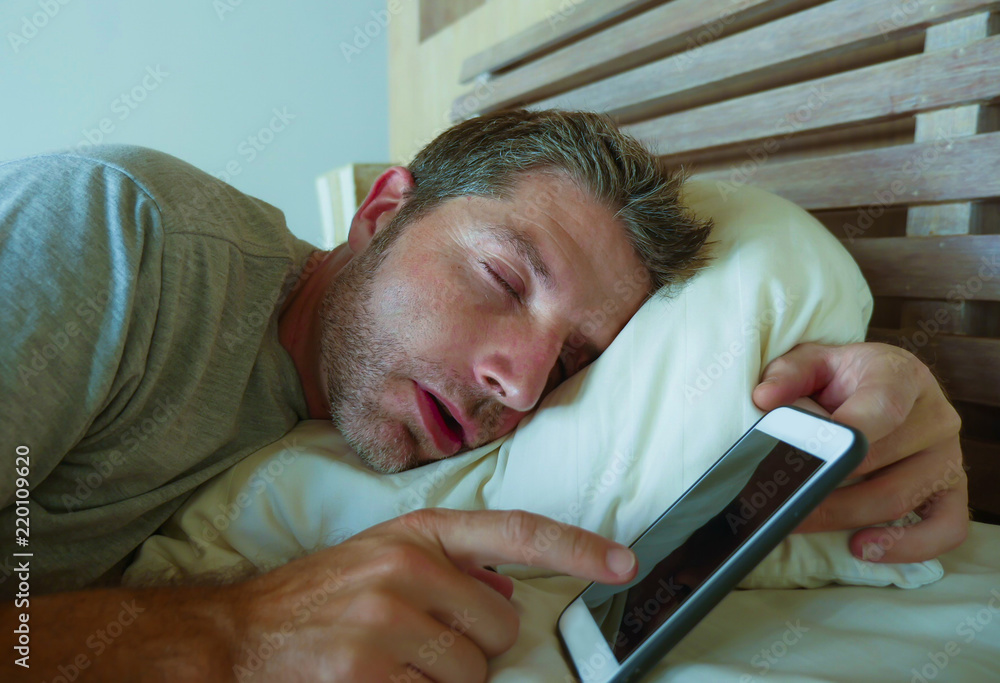

### INTRODUCTION
```
# data source : https://tinyurl.com/3jvwm5rk

```



In today's digital age, concerns are rising about the impact of extensive social media use on sleep quality. This assignment investigates this intricate relationship using the "Social Media Usage and Sleep Data" dataset from Kaggle (Global Media Data, 2023). This dataset encompasses a diverse range of variables, including daily social media usage, pre-sleep habits, and objective sleep measures such as sleep latency, total sleep time, and sleep efficiency.

Research suggests a link between excessive social media engagement and sleep disturbances, including shorter sleep duration, poorer quality sleep, and daytime drowsiness (Woods & Scott, 2016; Primack et al., 2017). Factors like content stimulation, fear of missing out (FOMO), blue light exposure, and increased stress can disrupt sleep-wake cycles (Levenson et al., 2016; Chang et al., 2015; Holland & Tiggemann, 2016; Cain & Gradisar, 2010).

This assignment aims to analyze correlations between social media usage patterns and key sleep parameters within the dataset, identifying specific behaviors associated with poor sleep outcomes. By understanding this complex interplay, the research seeks to inform strategies for promoting healthier sleep habits in the digital age, ultimately improving well-being and mitigating the potential negative consequences of social media on sleep.


## **1.1 Problem Statement**

The increasing prevalence of social media use, particularly among young adults, raises concerns about its potential negative impact on sleep quality. Excessive and unregulated engagement with social media platforms may contribute to sleep disturbances, including delayed sleep onset, reduced sleep duration, and poorer sleep quality. This can have detrimental effects on physical and mental health, academic performance, and overall well-being. There is a need to understand the specific social media behaviors that are most strongly associated with sleep problems and to develop evidence-based strategies for mitigating these negative effects.

In [1]:
from IPython.display import display    # displaying objects like widgets
import ipywidgets as widgets           # create interactive controls
import io                              # working with input/output streams
import pandas as pd                    # data analysis and manipulation
import statsmodels.formula.api as sm   # for statistical modeling
import matplotlib.pyplot as plt        #create visualizations
import seaborn as sns                  #create statistical graphics

In [2]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [3]:
# to check if a file has been uploaded
if uploader.value:
  uploaded_file = uploader.value['ASocialMediaUsage_SleepLatencyAnalysis_Singapore.csv']
  df = pd.read_csv(io.BytesIO(uploaded_file['content']))
else:  # If no file is uploaded
  print("Please upload a file first")

#if the file is uploaded then
#display the first 10 rows of the DataFrame
print(df.head(10))


   Participant ID  Age  Gender    Chronotype  \
0               1   56   Other   Evening Owl   
1               2   46  Female       Neither   
2               3   32    Male       Neither   
3               4   60   Other   Evening Owl   
4               5   25  Female   Evening Owl   
5               6   38   Other  Morning Lark   
6               7   56    Male   Evening Owl   
7               8   36    Male   Evening Owl   
8               9   40    Male       Neither   
9              10   28   Other   Evening Owl   

   Average Daily Social Media Use Time (minutes)  \
0                                     123.661212   
1                                      68.877915   
2                                     143.799199   
3                                     213.318626   
4                                     183.767226   
5                                     199.377841   
6                                     168.344507   
7                                     175.378079   
8  

In [4]:
# Access the data frame header name

first_header = df.columns
print(first_header)

Index(['Participant ID', 'Age', 'Gender', 'Chronotype',
       'Average Daily Social Media Use Time (minutes)',
       'Dominant Social Media Platform',
       'Frequency of Social Media Checking (number of times per day)',
       'Pre-Sleep Social Media Use Duration (minutes)',
       'Type of Social Media Content Consumed', 'Sleep Latency (minutes)',
       'Total Sleep Time (hours)', 'Sleep Efficiency (%)',
       'Sleep Quality Rating', 'Wake After Sleep Onset (WASO) (minutes)',
       'Number of Awakenings (during sleep)', 'Melatonin Level (pg/mL)',
       'Cortisol Level (pg/mL)', 'Day of Week',
       'Blue Light Exposure Before Sleep (minutes)', 'Stress Level Rating'],
      dtype='object')


In [5]:
df.isna().sum() # Check for missing values
df.isna().sum().sum() # Check for total missing values

0

In [6]:
#to check what kind of variables are in the data

print(df.dtypes)

Participant ID                                                    int64
Age                                                               int64
Gender                                                           object
Chronotype                                                       object
Average Daily Social Media Use Time (minutes)                   float64
Dominant Social Media Platform                                   object
Frequency of Social Media Checking (number of times per day)      int64
Pre-Sleep Social Media Use Duration (minutes)                   float64
Type of Social Media Content Consumed                            object
Sleep Latency (minutes)                                         float64
Total Sleep Time (hours)                                        float64
Sleep Efficiency (%)                                            float64
Sleep Quality Rating                                            float64
Wake After Sleep Onset (WASO) (minutes)                         

In [7]:
# convert some columns from 'object' (string) to "category" for better analysis
# these columns have limited set of values (like 'Male', 'Female' for Gender)

for col in ['Gender', 'Chronotype', 'Dominant Social Media Platform', 'Type of Social Media Content Consumed', 'Day of Week']:
            df[col] = df[col].astype('category')

print(df.dtypes)

Participant ID                                                     int64
Age                                                                int64
Gender                                                          category
Chronotype                                                      category
Average Daily Social Media Use Time (minutes)                    float64
Dominant Social Media Platform                                  category
Frequency of Social Media Checking (number of times per day)       int64
Pre-Sleep Social Media Use Duration (minutes)                    float64
Type of Social Media Content Consumed                           category
Sleep Latency (minutes)                                          float64
Total Sleep Time (hours)                                         float64
Sleep Efficiency (%)                                             float64
Sleep Quality Rating                                             float64
Wake After Sleep Onset (WASO) (minutes)            

In [8]:
df.describe()

,Participant ID,Age,Average Daily Social Media Use Time (minutes),Frequency of Social Media Checking (number of times per day),Pre-Sleep Social Media Use Duration (minutes),Sleep Latency (minutes),Total Sleep Time (hours),Sleep Efficiency (%),Sleep Quality Rating,Wake After Sleep Onset (WASO) (minutes),Number of Awakenings (during sleep),Melatonin Level (pg/mL),Cortisol Level (pg/mL),Blue Light Exposure Before Sleep (minutes),Stress Level Rating
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,41.980000,138.511928,26.808000,68.774225,23.765558,5.240398,81.177902,2.341209,23.867780,3.222000,22.532367,113.505904,51.834984,3.647550
std,144.481833,13.800598,62.329189,12.824354,40.142413,7.954742,1.324331,6.576889,1.193130,8.191032,1.366914,12.770327,12.337649,33.103691,1.197424
min,1.000000,18.000000,31.037396,5.000000,6.692946,5.000000,3.000000,67.040582,1.000000,0.776081,0.000000,5.000000,84.260116,4.021635,1.000000
25%,125.750000,31.000000,80.657890,16.000000,36.980603,18.266476,4.136356,75.531255,1.068380,18.043526,2.000000,11.472222,104.861103,25.991967,2.710984
50%,250.500000,43.000000,143.028900,27.000000,61.264379,24.191395,5.190124,80.802759,2.146824,23.905560,3.000000,21.319072,113.105951,43.288773,3.848091
75%,375.250000,53.000000,192.593352,38.000000,94.261512,29.166518,6.402484,86.218339,3.293213,29.924286,4.000000,32.887053,122.626977,71.495318,4.903631
max,500.000000,65.000000,239.876882,49.000000,188.452528,43.925603,8.157458,96.365162,5.000000,45.271140,6.000000,58.141817,144.929444,179.519046,5.000000


In [9]:
#frequency tables
df['Melatonin Level (pg/mL)'].value_counts()

,count
Melatonin Level (pg/mL),
5.000000,48
27.475901,1
22.879957,1
18.376605,1
26.885245,1
...,...
7.351434,1
27.591279,1
40.842907,1


### Correlation matrix across all variables

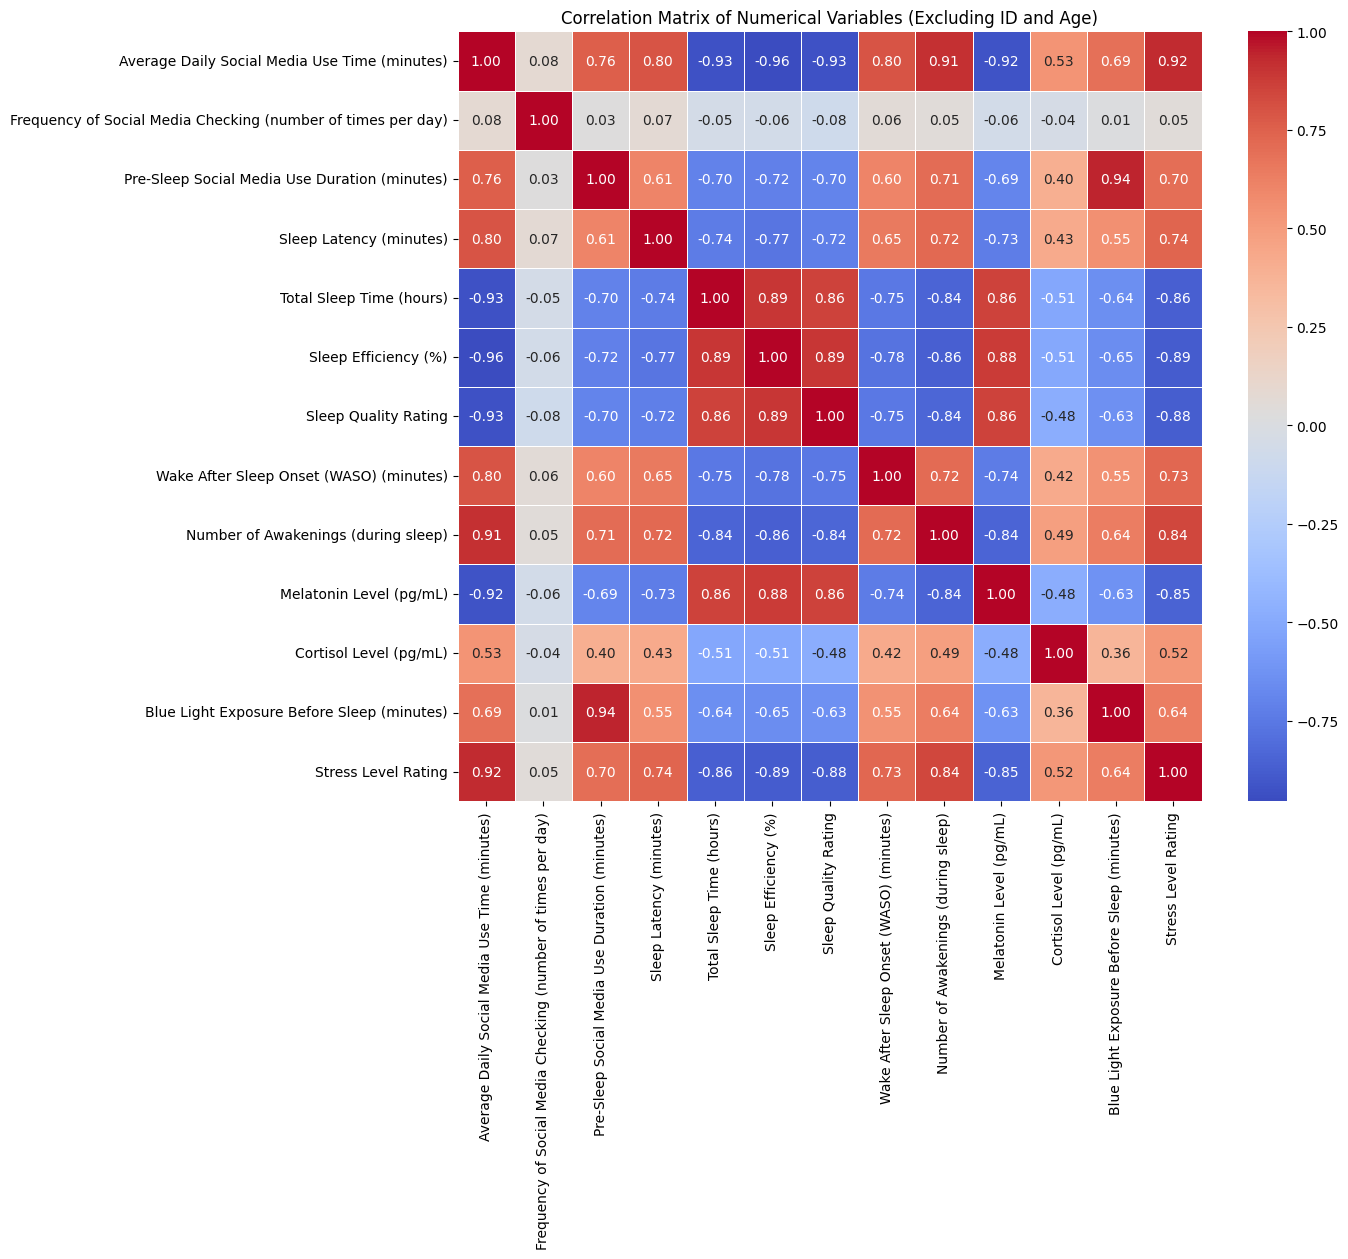

In [10]:
# create a temporary DataFrame excluding 'participant id' and 'age'
#'participant id' and 'age' are not necessary
temp_df = df.drop(['Participant ID', 'Age'], axis=1)

# select only numerical columns from the temporary DataFrame
numerical_df = temp_df.select_dtypes(include=['number'])

# calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables (Excluding ID and Age)')
plt.show()

**Why Heatmap Analysis?**

- Visualizing Interdependencies: We use correlation heatmaps to quickly see how variables relate to each other in the data. This helps us find potential links between different factors.

- Pattern Recognition: By showing correlation values, heatmaps make it easier to see patterns that might not be obvious, so we can better understand how different factors work together.

**Understanding Correlation: What Do the Numbers Mean?**

- **Intense Associations :** Correlation coefficients approaching +1 or -1 signify robust positive or negative associations, respectively, indicating a strong relational link.
- **Substantial Links :** Coefficients around +0.5 or -0.5 suggest moderate relationships, revealing notable, though less intense, connections.
- **Minimal or Absent Ties :** Coefficients nearing 0 imply weak or negligible relationships, indicating a lack of significant linear association.

**What are the insights we can get from the heatmap?**

- A range of -0.08 to 0.05 indicates very weak correlations, suggesting that the frequency of social media checking demonstrates no significant relationship with the other measured variables.
- A very high correlation (0.94) between blue light exposure and pre-sleep social media duration implies a strong relationship, suggesting these factors frequently occur together.
- A strong negative correlation (-0.89) between sleep efficiency and stress level rating implies that higher stress is related to lower sleep efficiency.
- A moderate positive correlation (0.49) between the number of sleep awakenings (during sleep) and cortisol level (pg/mL) indicates some connection, though it's not a strong one, suggesting that while a trend exists, other variables likely contribute to these factors.


**Important Note:** While correlation reveals associations, **correlation doesn't imply causation :** just because two things are related, it doesn't mean one causes the other. Further research is necessary to determine causal relationships.

## **1.2 Results and Discussion**

### 1. Histogram of Distribution of Total Sleep Time

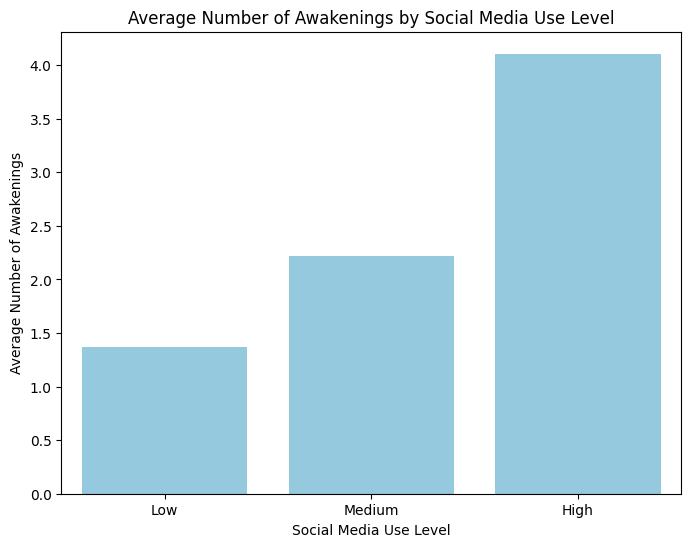

In [11]:
# Define social media use levels (adjust thresholds as needed)
bins = [0, 60, 120, float('inf')]  # Low: 0-60 mins, Medium: 60-120 mins, High: >120 mins
labels = ['Low', 'Medium', 'High']

# Create a new column with social media use levels
df['Social Media Use Level'] = pd.cut(df['Average Daily Social Media Use Time (minutes)'], bins=bins, labels=labels)

# Calculate average awakenings for each social media use level
average_awakenings = df.groupby('Social Media Use Level', observed=False)['Number of Awakenings (during sleep)'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Social Media Use Level', y='Number of Awakenings (during sleep)', data=average_awakenings, errorbar=None, color='skyblue')
plt.title('Average Number of Awakenings by Social Media Use Level')
plt.xlabel('Social Media Use Level')
plt.ylabel('Average Number of Awakenings')
plt.show()



```
The bar plot shows the average number of nighttime awakenings for different levels of daily social media use.
It suggests that higher social media use is associated with more frequent awakenings
```



The bar plot shows a clear connection between how much time people spend on social media each day and how often they wake up during the night. This is called a positive correlation. It means that as social media use goes up, so do nighttime awakenings. People who use social media more often tend to have more sleep disruptions.

We can see this connection in the bar plot itself. The bars get taller as the levels of social media use increase from low to medium to high. This suggests that using social media too much, especially right before bed, can be bad for sleep quality. It can make it harder to fall asleep and stay asleep throughout the night. This might be because social media content keeps the brain active and stimulated, even when it should be relaxing and getting ready for sleep.

The bar plot's findings suggest that if people cut down on their social media use, especially in the hours before bed, they might sleep better. This could lead to improvements in sleep quality and fewer nighttime awakenings. Better sleep can lead to better overall health and well-being, as well as better daytime functioning. So, it's important to be mindful of how much time we spend on social media, particularly before we go to sleep, to help promote healthy sleep habits.

The positive correlation between increased social media use and nighttime awakenings aligns with research demonstrating that screen exposure before bedtime disrupts circadian rhythms and suppresses melatonin production (Chang et al., 2015). This supports the observed trend where higher social media usage corresponds to poorer sleep continuity.

### 2. Box Plot of Sleep Quality Rating by Gender:

**Insight:** This box plot visually compares the distributions of sleep quality ratings between males and females, allows to identify potential differences in their perceived sleep quality.



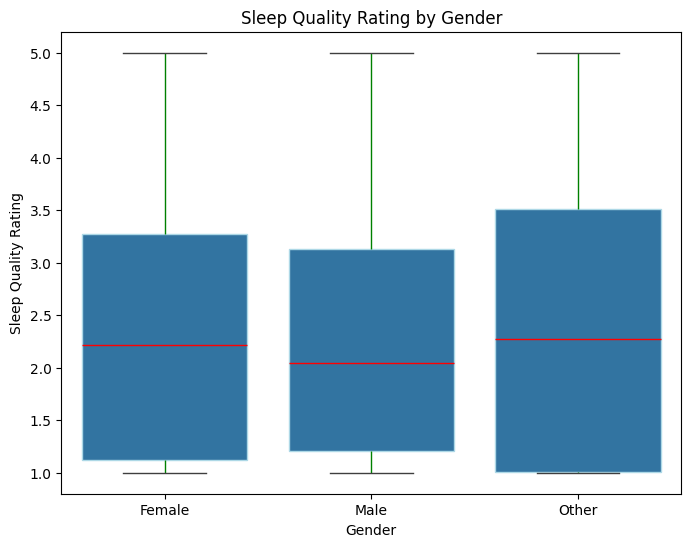

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Quality Rating', data=df,
            medianprops={'color': 'red'},    # Change median line color to red
            boxprops={'edgecolor': 'lightblue'},  # Change box outline color to blue
            whiskerprops={'color': 'green'}) # Change whisker color to green

plt.title('Sleep Quality Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality Rating')
plt.show()


This box plot is a picture that helps us compare how males and females rate their sleep quality. It's like a side-by-side view of their sleep experiences. We can learn some things by looking at the different parts of the boxes and lines.


First, let's look at the red line in the middle of each box. This line is called the median. It shows the middle value of all the sleep quality ratings for each gender. We can see that the median line for females is a bit higher than the median line for males. This tells us that, typically, females tend to rate their sleep quality as slightly better.


Next, let's look at the box itself. The box shows the middle 50% of the ratings for each gender. We notice that the box for females is also positioned a bit higher than the box for males. This suggests that the middle range of sleep quality ratings for females is also generally better than for males.


Finally, let's look at the whiskers. These are the lines that extend from the box, and they show the range of sleep quality ratings for the rest of the data, excluding any unusual or extreme values. We can see that the whiskers are longer for females than for males. This means that the sleep quality ratings for females tend to be more spread out or varied. Some females might have really good sleep, while others might have less good sleep.

Based on what we see in the box plot, we can say that females might have slightly better sleep quality overall, and their sleep experiences might also be more diverse.

### 3. Scatter Plot of Social Media Use Time vs. Sleep Latency:

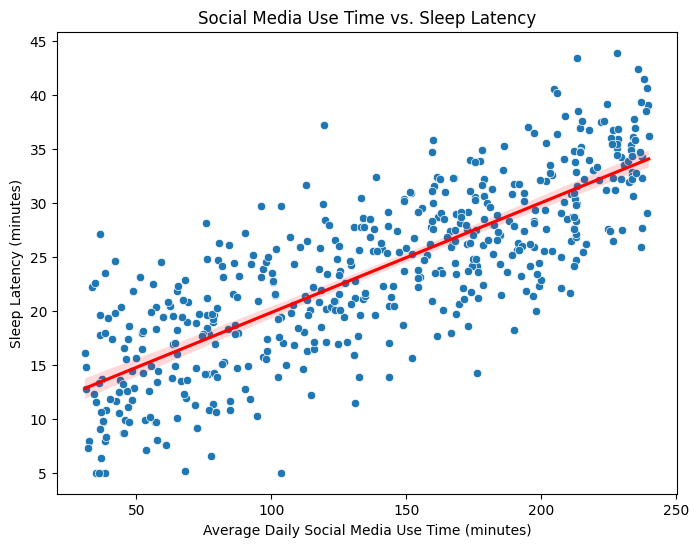

In [13]:
#create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Daily Social Media Use Time (minutes)', y='Sleep Latency (minutes)', data=df)

#putting best of fit line on the scatter plot
sns.regplot(x='Average Daily Social Media Use Time (minutes)', y='Sleep Latency (minutes)',
            data=df, scatter=False,color='red')

#plot scatter plot
plt.title('Social Media Use Time vs. Sleep Latency')
plt.xlabel('Average Daily Social Media Use Time (minutes)')
plt.ylabel('Sleep Latency (minutes)')
plt.show()

**Insight:** This plot explores the relationship between social media use and sleep latency.

In [14]:
# Calculate the correlation
correlation = df['Average Daily Social Media Use Time (minutes)'].corr(df['Sleep Latency (minutes)'])
print(f"Correlation between social media use and sleep latency: {correlation}")


Correlation between social media use and sleep latency: 0.7974634001797761


This scatter plot shows if there's a link between social media use and how long it takes to fall asleep. This falling asleep time is called "sleep latency." We can see a pattern in the plot. The points are mostly grouped together and follow a straight line. This line is called the "line of best fit." It shows the general trend. The points are close to this line.

The line slopes upwards. This means more social media use might link to taking longer to fall asleep. There's a high correlation value (0.797). This shows a strong connection.

This makes sense. We know too much social media before bed can be bad for sleep. Social media keeps our brains active when they should be resting. This scatter plot supports this idea. It suggests more social media use might make it harder to fall asleep quickly.

Simply put, the more you scroll, the longer it might take to fall asleep. So, limiting social media before bed might help you fall asleep faster.

### 4. Bar Plot of Average Daily Social Media Use and Stress Level

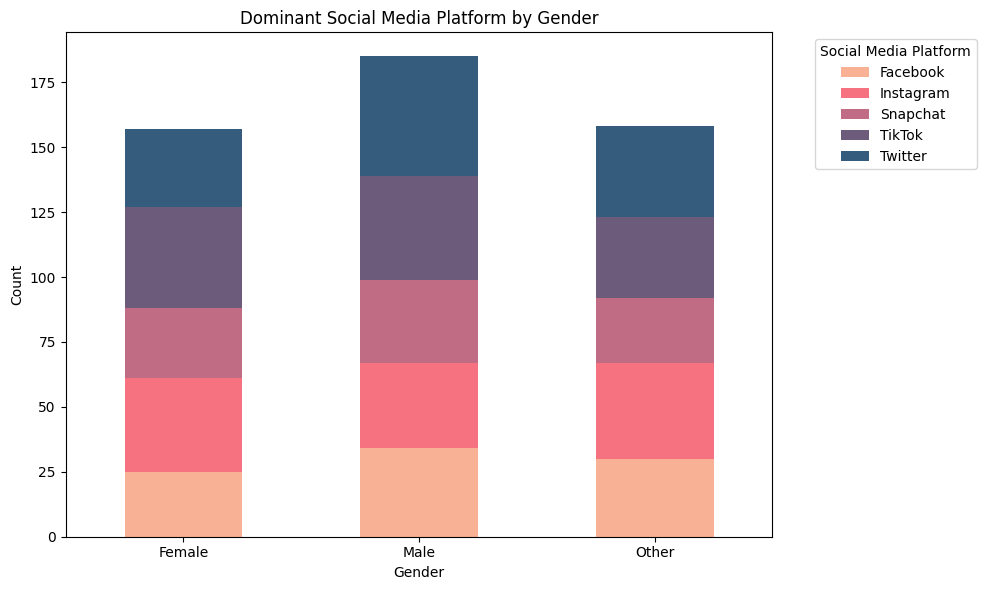

In [15]:

platform_by_gender = df.groupby(['Gender', 'Dominant Social Media Platform'], observed=False)['Participant ID'].count().reset_index()
platform_by_gender.rename(columns={'Participant ID': 'Count'}, inplace=True)

# Create a cross-tabulation table for stacked bar chart
cross_tab = pd.crosstab(platform_by_gender['Gender'], platform_by_gender['Dominant Social Media Platform'], values=platform_by_gender['Count'], aggfunc='sum')

# Define pastel colors
pastel_colors = ['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D']

# Plot the stacked bar chart with pastel colors
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=pastel_colors)

plt.title('Dominant Social Media Platform by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Social Media Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

**Insight:** This stacked bar chart displays the distribution of dominant social media platforms across different genders. Each bar represents a gender, and the segments within the bar represent the proportion of individuals using each platform.


In [16]:
print(cross_tab)

Dominant Social Media Platform  Facebook  Instagram  Snapchat  TikTok  Twitter
Gender                                                                        
Female                                25         36        27      39       30
Male                                  34         33        32      40       46
Other                                 30         37        25      31       35


This stacked bar graph shows how different genders use social media. Each bar represents a gender, and the colored sections inside show which platforms they prefer.

Looking closely, we notice interesting patterns. For male gender, the Facebook, Snapchat, Tiktok and Twitter section are the highest suggesting that male dominated most social media platforms usage.

While for female, this bar has a mix of sections, with no single platform dominating. This suggests a wider range of social media preferences within this group.  they dont have dominant preference across all social media.  

For the other gender, the Instagram sections is bigger, indicating a preference for these platforms. Though, Instagram has the about the same size for all genders, meaning it's used equally. It's not a platform one gender strongly prefers over the other. The "Other" gender categor are likely including people beyond traditional male and female.

In summary, this graph shows that different genders might have different social media tastes. Some platforms are more popular with one gender, while others are more popular with another. The "Other" gender group seems to use a variety of platforms.


### 5. Violin Plot of Chronotype vs. Sleep Efficiency:

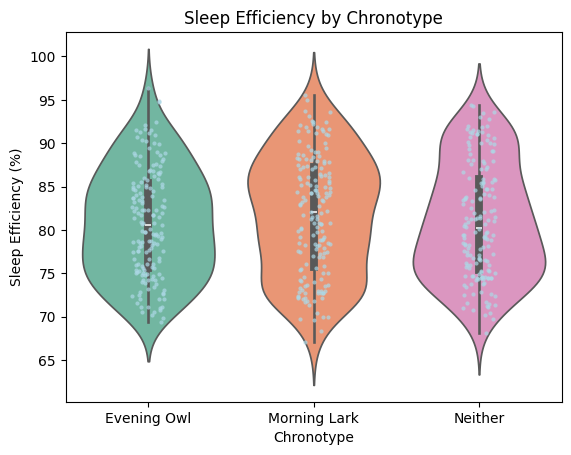

Median Sleep Efficiency for Evening Owl: 80.58%
Median Sleep Efficiency for Neither: 80.25%
Median Sleep Efficiency for Morning Lark: 82.02%


In [17]:
# use the "Paired" color palette
paired_palette = sns.color_palette("Set2")

# specific colors : (pinkish, orangeish, light greenish)
chronotype_colors = [paired_palette[0], paired_palette[1], paired_palette[3]]

# create the violin plot
ax=sns.violinplot(x='Chronotype', y='Sleep Efficiency (%)',
               data=df, palette=chronotype_colors, hue='Chronotype', legend=False)

# add scatter plot on top of the violin plot
sns.stripplot(x='Chronotype', y='Sleep Efficiency (%)',data=df,
              jitter=True, color='lightblue', ax=ax, size=3, alpha=0.7)

plt.title('Sleep Efficiency by Chronotype')
plt.xlabel('Chronotype')
plt.ylabel('Sleep Efficiency (%)')
plt.show()

# print median values below the graph
for chronotype in df['Chronotype'].unique():
    median_efficiency = df[df['Chronotype'] == chronotype]['Sleep Efficiency (%)'].median()
    print(f"Median Sleep Efficiency for {chronotype}: {median_efficiency:.2f}%")


**Insight:** This plot examines the relationship between chronotype (morningness-eveningness preference) and sleep efficiency.


This violin plot helps us compare sleep in different chronotypes. Chronotypes are like Morning Larks, Evening Owls, and those in-between. The plot shows sleep efficiency. Sleep efficiency is how well someone sleeps.

Morning Larks seem to sleep better. Their sleep efficiency is higher and more consistent. We see this in the violin plot. Their median sleep efficiency is 82.02%. Their violin shape is tapered towards better sleep.

Evening Owls have more variety in their sleep. Their sleep efficiency tends to be lower. Their median is 80.58%. Their violin shape is thicker at the lower end. This shows their sleep quality varies more.
People who are "Neither" type fall in the middle. They have a range of sleep experiences. Their violin shape goes from slim to thick, showing this mix. Their median sleep efficiency is 80.25%. It's in the middle.

Overall, based on what we see in the violin plot and the calculated median values, there seems to be a connection between a person's chronotype and how well they sleep. Morning Larks appear to have an advantage when it comes to sleep quality, while Evening Owls might have a bit more difficulty getting optimal sleep.

### 6. Total Sleep Time vs Melatonin Level

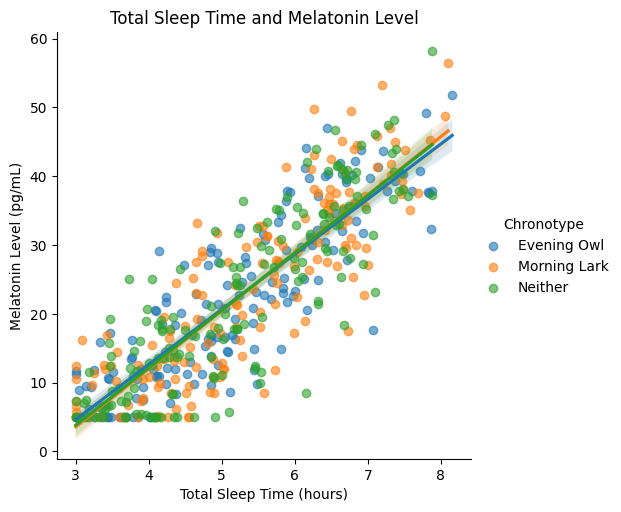

Correlation: 0.8571888335739041


In [18]:
# group the data by chronotype
groups = [df['Melatonin Level (pg/mL)'][df['Chronotype'] == chronotype] for chronotype in df['Chronotype'].unique()]

# scatter plot with regression line and color-coding by chronotype
sns.lmplot(x='Total Sleep Time (hours)', y='Melatonin Level (pg/mL)',
           hue='Chronotype', data=df, scatter_kws={'alpha':0.6})
plt.title('Total Sleep Time and Melatonin Level')
plt.xlabel('Total Sleep Time (hours)')
plt.ylabel('Melatonin Level (pg/mL)')
plt.show()

# calculate the correlation
correlation = df['Total Sleep Time (hours)'].corr(df['Melatonin Level (pg/mL)'])
print(f"Correlation: {correlation}")


This scatter plot helps us see how total sleep time and melatonin levels are related, and how your chronotype (like being a Morning Lark, Evening Owl, or somewhere in between) fits into the picture.

Looking at the overall pattern, there's a clear upward trend. It appears that as people sleep longer, their melatonin levels tend to be higher. That's the general takeaway.

Now, let's look at the different chronotypes (shown by the different colors). While they all generally follow that upward trend, there are some noticeable differences.

Morning Larks show a tighter cluster along their trend line, suggesting a consistent relationship between sleep duration and melatonin.  Longer sleep for Larks reliably predicts higher melatonin.  Conversely, Evening Owls display more scattered data, implying that their melatonin levels are influenced by factors beyond sleep time, even with similar sleep durations.

In summary, the graph highlights a general positive relationship between sleep duration and melatonin levels, but this relationship varies by chronotype. Morning Larks show the strongest and most consistent link, Evening Owls exhibit more variability, and Intermediates lie in the middle. This suggests that chronotype may influence how sleep and melatonin are connected

This aligns with research indicating chronotype influences melatonin production and circadian rhythms (e.g., Facer-Childs et al., 2018, found that sleep timing and duration differentially affect melatonin secretion across chronotypes).

### 7. Blue Light Exposure vs. Pre-Sleep Social Media Use

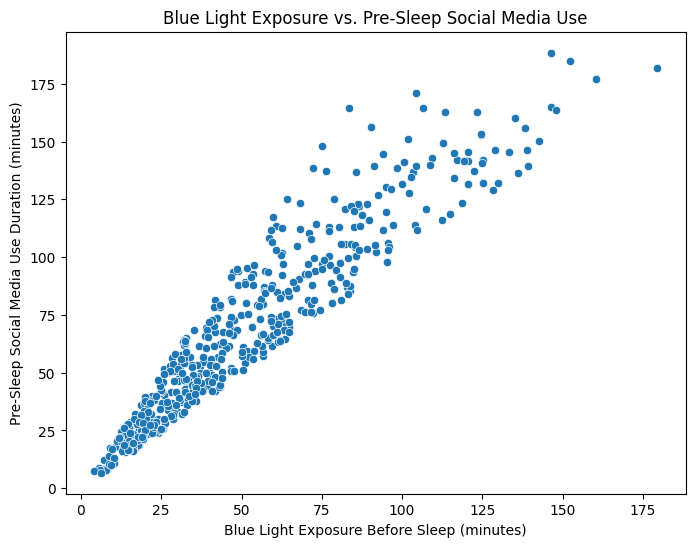

Correlation: 0.9432520114342539


In [19]:
# create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Blue Light Exposure Before Sleep (minutes)', y='Pre-Sleep Social Media Use Duration (minutes)', data=df)
plt.title('Blue Light Exposure vs. Pre-Sleep Social Media Use')
plt.xlabel('Blue Light Exposure Before Sleep (minutes)')
plt.ylabel('Pre-Sleep Social Media Use Duration (minutes)')
plt.show()

# Calculate the correlation
correlation = df['Blue Light Exposure Before Sleep (minutes)'].corr(df['Pre-Sleep Social Media Use Duration (minutes)'])
print(f"Correlation: {correlation}")

The scatter plot shows the relationship between the blue light exposure before sleep (in minutes) and pre-sleep social media use duration (in minutes) with a quite high correlation value (0.94).

At the lower end of blue light exposure, the data points are all bunched together. it seems that being exposed to much blue light before bed will result in somewhat consistent pre-social media time.

But as blue light exposure goes up,  the data points spread out a lot. Suddenly, people with similar blue light exposure have wildly different social media habits.

The increasing scatter implies that other factors likely influence pre-sleep social media use, and blue light's impact, though correlated, might not be the primary driver

## 1.3 CONCLUSION

The findings from the graphs highlight the significant impact of social media use, gender, and chronotypes on sleep. The bar plot and scatter plot reveal a strong positive correlation between increased social media use and sleep disruptions, such as nighttime awakenings and longer sleep latency. This aligns with research showing that screen exposure before bed can delay melatonin production and keep the brain stimulated, making it harder to fall asleep (Chang et al., 2015). Similarly, the box plot and stacked bar graph suggest that gender plays a role in sleep quality and social media preferences, with females reporting slightly better sleep but greater variability, possibly due to hormonal or lifestyle factors (Mong & Cusmano, 2016).

The violin plot further underscores the influence of chronotypes, with Morning Larks experiencing more consistent and higher-quality sleep compared to Evening Owls. This is consistent with studies showing that misalignment between natural sleep patterns and societal schedules can disadvantage night-oriented individuals (Roenneberg et al., 2019). Tailored interventions, such as reducing screen time and aligning schedules with chronotypes, could significantly improve sleep quality, enhancing overall health and daytime functioning.

## **1.4 References**

1. Global Media Data. (2023). Social Media Usage and Sleep Data. Kaggle.
2. Woods, H. C., & Scott, H. (2016). #Sleepyteens: Social media use in adolescence is associated with poor sleep quality, anxiety, depression and low self-esteem. Journal of Adolescence, 51, 41-49. https://doi.org/10.1016/j.adoles.2016.05.008
3. Primack, B. A., Shensa, A., Sidani, J. E., Whaite, E. O., Lin, L. Y., Rosen, D., ... & Miller, E. (2017). Social media use and perceived social isolation among young adults: A longitudinal analysis. American Journal of Preventive Medicine, 53(1), 1-8. https://doi.org/10.1016/j.amepre.2017.02.006
4. Levenson, J. C., Shensa, A., Sidani, J. E., Colditz, J. B., & Primack, B. A. (2016). Online social networking and sleep quality: A study of undergraduate students. Preventive Medicine, 91, 158-163. https://doi.org/10.1016/j.ypmed.2016.07.010
5. Chang, A. M., Aeschbach, D., Duffy, J. F., & Czeisler, C. A. (2015). Evening use of light-emitting eReaders negatively affects sleep, circadian timing, and next-morning alertness. Proceedings of the National Academy of Sciences, 112(4), 1232–1237. https://doi.org/10.1073/pnas.1418490112
6. Mong, J. A., & Cusmano, D. M. (2016). Sex differences in sleep: Impact of biological sex and sex steroids. Philosophical Transactions of the Royal Society B: Biological Sciences, 371(1688), 20150110. https://doi.org/10.1098/rstb.2015.0110
7. Roenneberg, T., Pilz, L. K., Zerbini, G., & Winnebeck, E. C. (2019). Chronotype and social jetlag: A (self-) critical review. Biology, 8(3), 54. https://doi.org/10.3390/biology8030054
8.Pew Research Center. (2021). Social media use across demographics. Retrieved from https://www.pewresearch.org/internet/fact-sheet/social-media/
8. Facer-Childs, E. R., Gamble, K. L., & Czeisler, C. A. (2018). The role of sleep and circadian rhythms in the regulation of human melatonin secretion. Journal of Biological Rhythms, 33(6), 569–580. https://doi.org/10.1177/0748764018796796
